In [110]:
# The simulation is based on the following:
# A number of people are moving randomly in specified square space
# the starting locations of persons are also random
# If in one second, the healthy people is within 1 meter from a contracted person, we randomly decide whether the person is contracted
# Every seconds a person move under a normal distribution of mean=0, standard deviation is specified by user, in meter
# We simulate the changes of location & state of persons every second
import numpy as np
import matplotlib.pyplot as plt

class person:
    def __init__(self, dist_room, state):
        """
        A simulation of a person, containing location & moving state
        Input: 
            dist_room: How large the space is for the person to be created
        Attributes:
            x:x of coordinate
            y:y of coordinate
            dist_room: the space of room in meter
            state: whether the person is walking or driving
        """
        self.x = np.random.uniform(low=-dist_room/2, high=dist_room/2)
        self.y = np.random.uniform(low=-dist_room/2, high=dist_room/2)
        self.dist_room = dist_room
        self.state = state

    def move(self, dist_walk, dist_drive):
        """
        Let the person "move" one second by changing coordinates, update x & y, distance fixed by input, direction random
        Input: 
            dist_walk: moving distance of moving per second i by walking
            dist_drive: moving distance of moving per second i by driving
        """
        angle = np.random.uniform(low=0, high=2*np.pi)
        if self.state == 0:
            self.x = self.x+dist_walk*np.cos(angle)
            self.y = self.y+dist_walk*np.sin(angle)
        else:
            self.x = self.x+dist_drive*np.cos(angle)
            self.y = self.y+dist_drive*np.sin(angle)

    def reset(self):
        """
        Reset the attributes
        """
        self.x = np.random.uniform(
            low=-self.dist_room/2, high=self.dist_room/2)
        self.y = np.random.uniform(
            low=-self.dist_room/2, high=self.dist_room/2)


class room:
    def __init__(self, dist_room, guests):
        """
        Build the room with specified space, total guests anyd initial total patients
        Input:
            dist_rooms: width of the space, in meter
            guests: total guests at start
            init_covid: total covid patients at start
        Attributes:
            guest_list: the list of Person objects representing person information
            init_covid: total covid patients at start
            guests: total guests at start
            dist_rooms: width of the space, in meter
            total_contracted: the final total patients at the end of simulation
            contracted: list of contracted persons
            healthy: list of healthy persons
        """
        self.guest_list = [person(dist_room, 0) for i in range(guests)]
        self.guests = guests
        self.dist_room = dist_room
        self.total_contact = 0
        self.contact_list = []

    def reset(self):
        """
        Reset the attributes
        """
        self.guest_list = [person(self.dist_room, 0)
                           for i in range(self.guests)]
        self.total_contact = 0

    def simulate_sec(self, dist_walk, dist_drive, state):
        """
        Simulate the state of persons in this room after one second passes
        If in one second, the healthy people is within 1 meter from a contracted person, we randomly decide whether the person is contracted
        Input: dist: standard deviation of moving per second in a normal distribution
        """
        angle = np.random.uniform(low=0, high=2*np.pi)
        if state == 0:
            Base_move_x = dist_walk*np.cos(angle)
            Base_move_y = dist_walk*np.sin(angle)
        else:
            Base_move_x = dist_drive*np.cos(angle)
            Base_move_y = dist_drive*np.cos(angle)
        for j in range(len(self.guest_list)):
            self.guest_list[j].move(dist_walk, dist_drive)
            self.guest_list[j].x = self.guest_list[j].x-Base_move_x
            self.guest_list[j].y = self.guest_list[j].x-Base_move_y
            if (max(self.guest_list[j].x, self.guest_list[j].y) > self.dist_room/2) | (min(self.guest_list[j].x, self.guest_list[j].y) < -self.dist_room/2):
                self.guest_list[j] = person(self.dist_room, 0)
                self.guest_list[j].x = np.random.choice(
                    [-self.dist_room/2, self.dist_room/2], p=[0.5, 0.5])
                self.guest_list[j].y = np.random.uniform(
                    low=-self.dist_room/2, high=self.dist_room/2)
        for l in self.guest_list:
            if ((l.x**2+l.y**2) < 1) & (l not in self.contact_list):
                if l.state == 0:
                    self.total_contact += 1
                else:
                    self.total_contact += 0.1
                self.contact_list.append(l)

    def simulate(self,  dist_walk, dist_drive, state_list):
        """
        Simulate the state of persons in this room after specified length of time passes
        Input: 
            dist: standard deviation of moving per second in a normal distribution
            time: specified time length
        """
        self.reset()
        for i in range(len(state_list)):
            for j in range(len(self.guest_list)):
                self.guest_list[j].state = state_list[i]
            self.simulate_sec(dist_walk, dist_drive, i)
            
def one_day_simulation(perc_dec):
    """
    This one day simulation costs 3 minutes.
    Input: perc
    """
    #I think one day a person usually walks 4 hours and drive 2 hours
    timelist = np.concatenate(
        (np.ones(3600), np.zeros(3600*4), np.ones(3600)))
    
    simulation = room(100, 30)
    simulation.simulate(20, 1, timelist)

    simulation1 = room(100, 30)
    simulation1.simulate(20*(1-perc_dec), 1*(1-perc_dec), timelist)

    return simulation1.total_contact/simulation.total_contact-1

In [94]:
one_day_simulation(0.6)

0.7944598276093057

In [95]:
one_day_simulation(0.4)

0.502346576462549

In [96]:
one_day_simulation(0.2)

0.1764514463969115

In [111]:
x=np.linspace(0,0.9,10)

In [112]:
desc=[one_day_simulation(i) for i in x]

In [113]:
desc

[-0.0410944089975126,
 -0.024793839768444847,
 -0.055327299983343514,
 -0.14393049370235766,
 -0.2457640750670239,
 -0.33490237584602944,
 -0.48064796390235665,
 -0.6553735073590667,
 -0.8249518039107683,
 -0.9526922652543308]

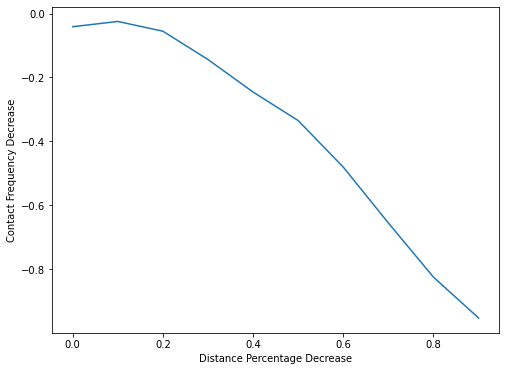

In [116]:
plt.figure(figsize=(8,6))
plt.plot(x,desc)
plt.ylabel('Contact Frequency Decrease')
plt.xlabel('Distance Percentage Decrease')
plt.show()